In [1]:
!mkdir '/kaggle/working/yolov11'

In [2]:
ROT_DIR = '/kaggle/working/yolov11'

In [3]:

!pip install git+https://github.com/ultralytics/ultralytics.git

  Cloning https://github.com/ultralytics/ultralytics.git to /tmp/pip-req-build-v47yby3i
  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/ultralytics.git /tmp/pip-req-build-v47yby3i
  Resolved https://github.com/ultralytics/ultralytics.git to commit 5dcaa0aa06ad580d434a7adfe145fab13354ab5d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ultralytics: filename=ultralytics-8.3.7-py3-none-any.whl size=882981 sha256=da294dcd790ec456ee6f25896eae7fe1bed58f101af17e834a54d997ae8cbfb6
  Stored in directory: /tmp/pip-ephem-wheel-cache-48hcqdel/wheels/45/25/b9/9f1e3857f58c296e7854ef871c3f5a15d519cc6c679848df8e
Successfully built ultralytics


In [4]:

import ultralytics
ultralytics.checks()

Ultralytics 8.3.7 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5933.9/8062.4 GB disk)


In [5]:
%cd {ROT_DIR}

/kaggle/working/yolov11


In [6]:
%ls

In [7]:
!pip install Ipython

In [8]:
!pip install matplotlib

In [9]:

import matplotlib.pyplot as plt
from IPython.display import display, Image


In [10]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 2.9 MB/s eta 0:00:00


In [11]:


from roboflow import Roboflow
rf = Roboflow(api_key="61YtoUg7OGtVF7sQcMCa")
project = rf.workspace("hirad-yvqyy").project("traffic_01-lllrb")
version = project.version(2)
dataset = version.download("yolov11")
                

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Traffic_01-2 in yolov11:: 100%|██████████| 4793/4793 [00:00<00:00, 5307.60it/s]


In [12]:
dataset.location

'/kaggle/working/yolov11/Traffic_01-2'

In [13]:
%rm -rf /kaggle/working/yolov11/Traffic_01-2/data.yaml

In [14]:
import yaml
import os

# مسیر فایل YAML
file_path = '/kaggle/working/yolov11/Traffic_01-2/data.yaml'

# اگر مسیر وجود ندارد، آن را ایجاد کنید
os.makedirs(os.path.dirname(file_path), exist_ok=True)


# مشخصات فایل YAML
data_yaml = {
    'train': '/kaggle/working/yolov11/Traffic_01-2/train/images',
    'val': '/kaggle/working/yolov11/Traffic_01-2/valid/images',
    'test': '../test/images',
    'nc': 3,
    'names': ['Crowded Street', 'No Traffic', 'Traffic'],
    'roboflow': {
        'workspace': 'hirad-yvqyy',
        'project': 'seq-roud',
        'version': 12,
        'license': 'CC BY 4.0',
        'url': 'https://universe.roboflow.com/hirad-yvqyy/seq-roud/dataset/12'
    }
}

# نوشتن مشخصات به فایل YAML
with open('/kaggle/working/yolov11/Traffic_01-2/data.yaml', 'w') as yaml_file:
    yaml.dump(data_yaml, yaml_file, sort_keys=False)

print("فایل data.yaml با موفقیت ایجاد شد.")


فایل data.yaml با موفقیت ایجاد شد.


train

In [15]:

# !yolo task=segment mode=train model=yolov8x-seg.pt data=/kaggle/working/yolov8/seq-roud-10/data.yaml epochs=100 imgsz=640

!yolo task=segment mode=train model=yolo11x-seg.pt data=/kaggle/working/yolov11/Traffic_01-2/data.yaml epochs=100 imgsz=640 plots=True batch=10 lr0=0.0005

100%|█████████████████████████████████████████| 119M/119M [00:00<00:00, 451MB/s]
Ultralytics 8.3.7 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=segment, mode=train, model=yolo11x-seg.pt, data=/kaggle/working/yolov11/Traffic_01-2/data.yaml, epochs=100, time=None, patience=100, batch=10, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, s

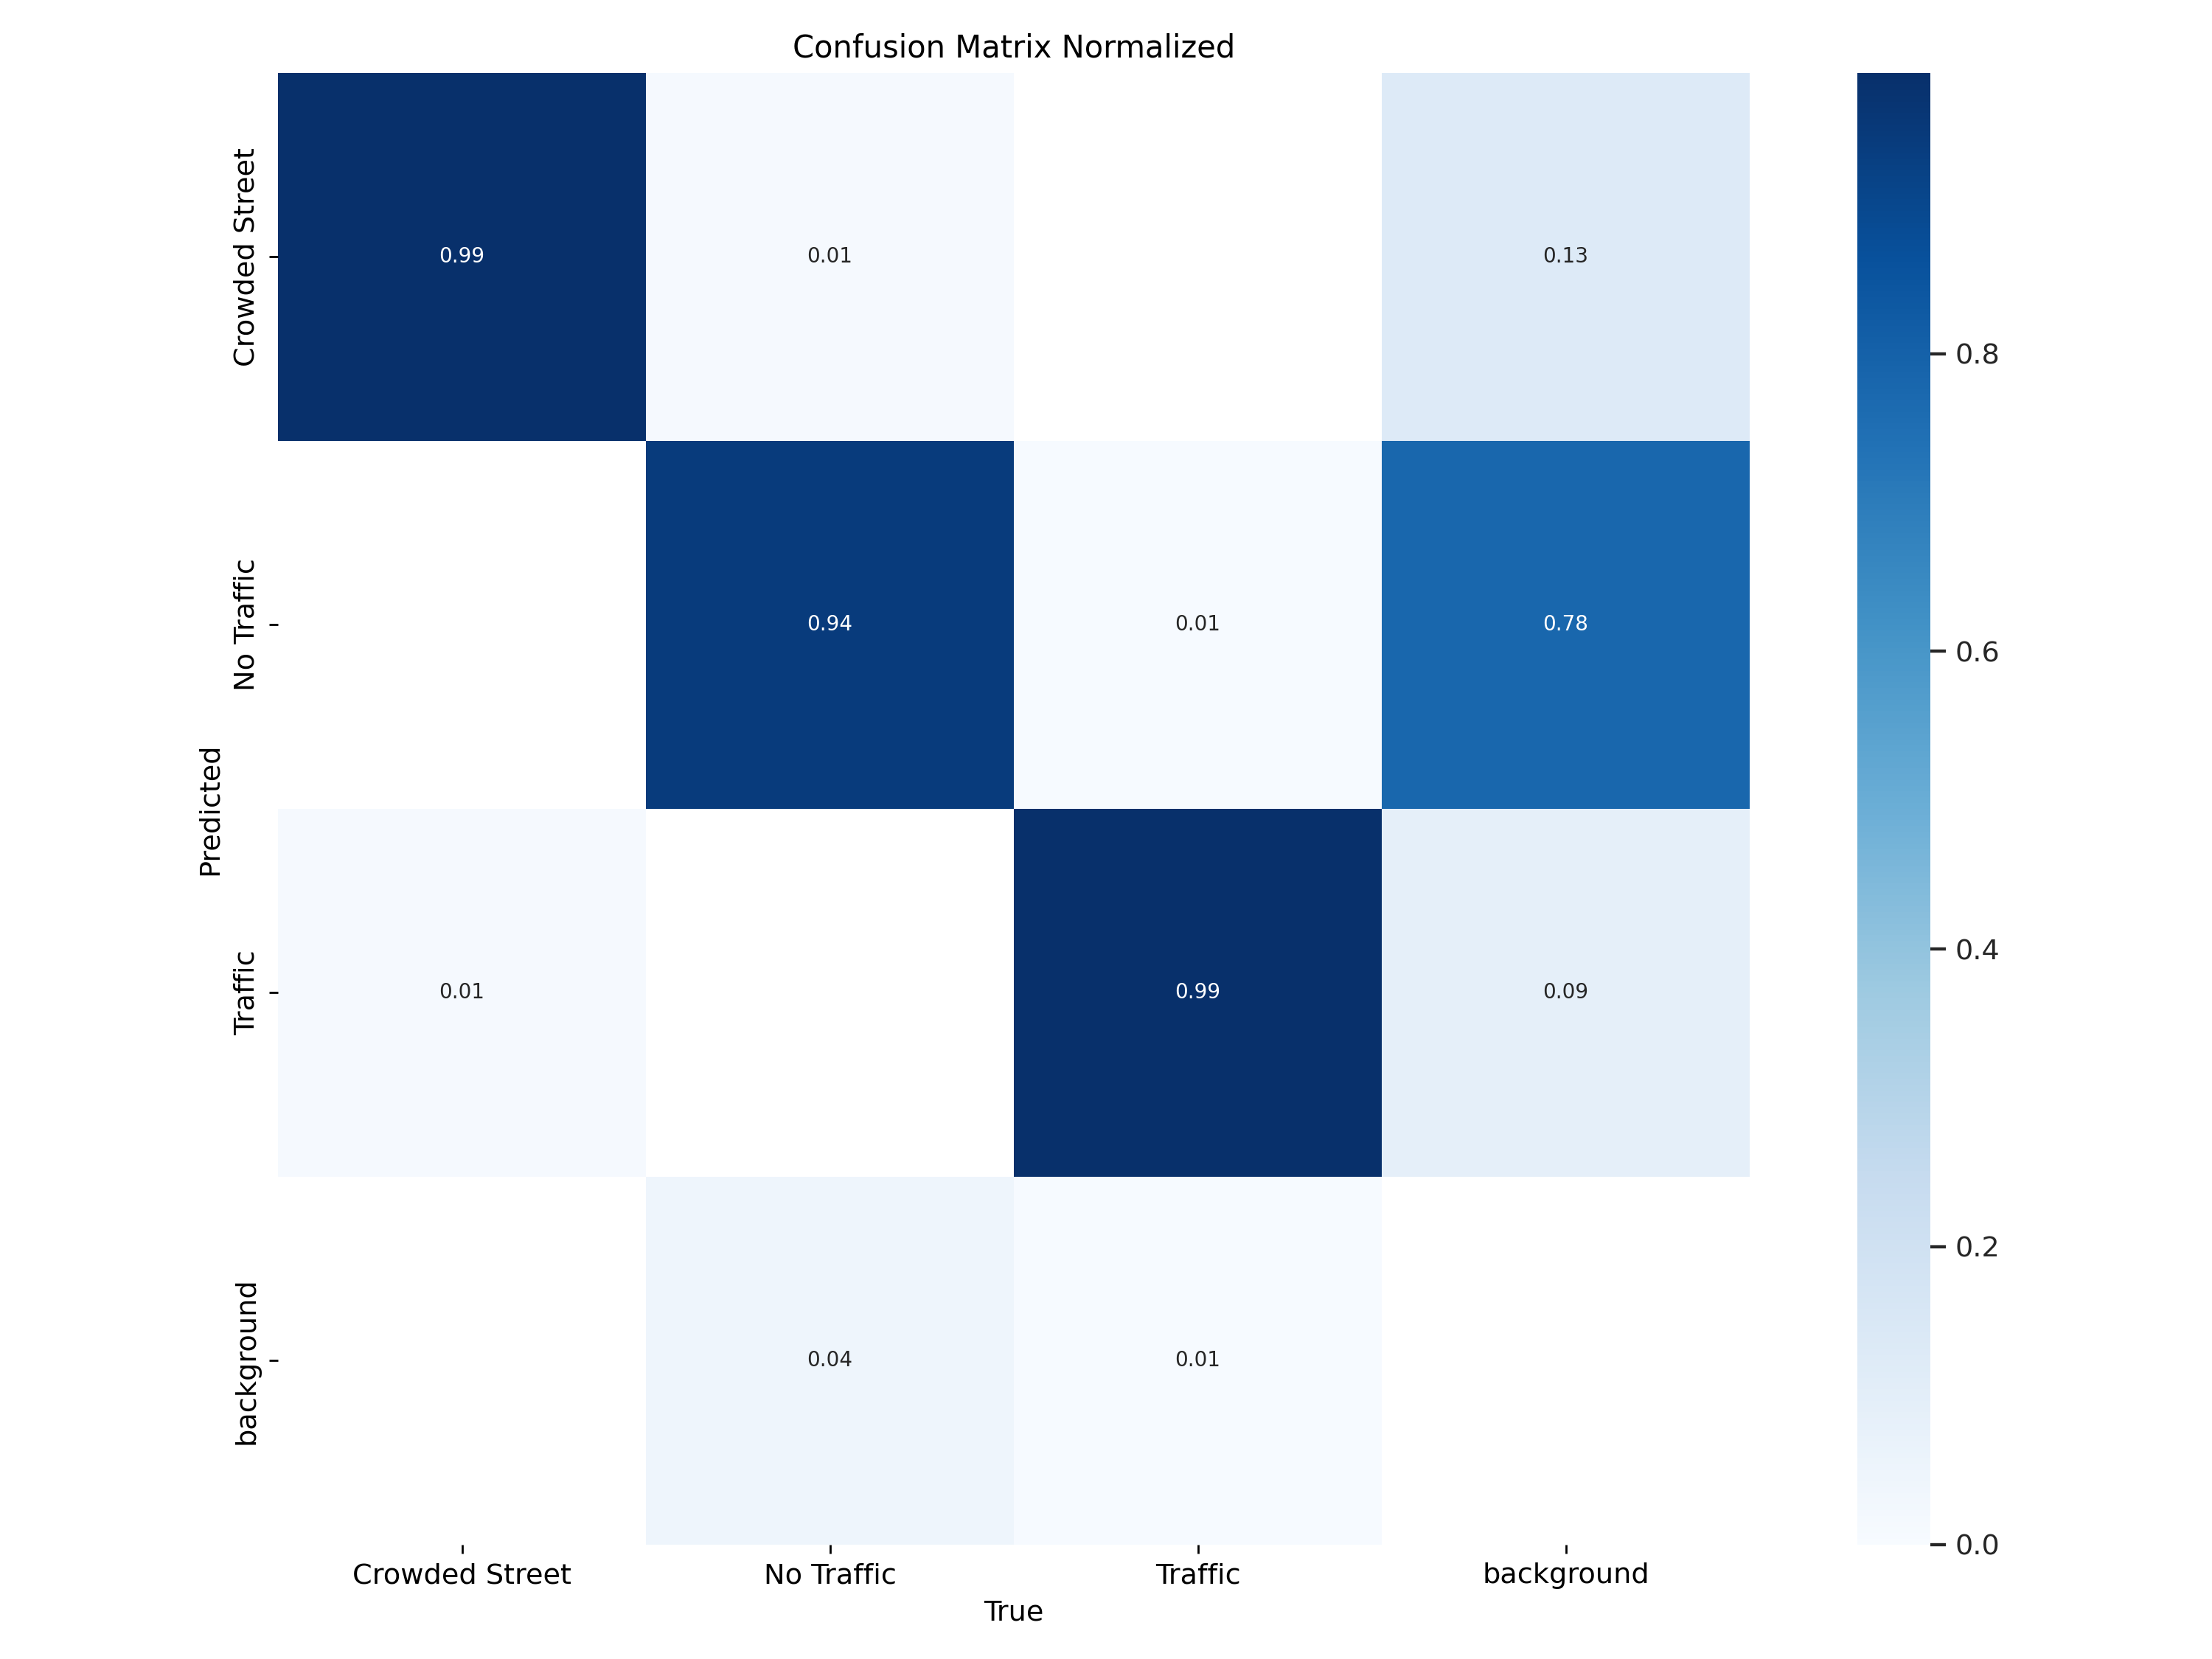

In [17]:
# Image(filename='/kaggle/working/yolov8/runs/segment/train/confusion_matrix.png', width=600)
from IPython.display import Image as IPyImage

IPyImage(filename='/kaggle/working/yolov11/runs/segment/train/confusion_matrix_normalized.png', width=600)

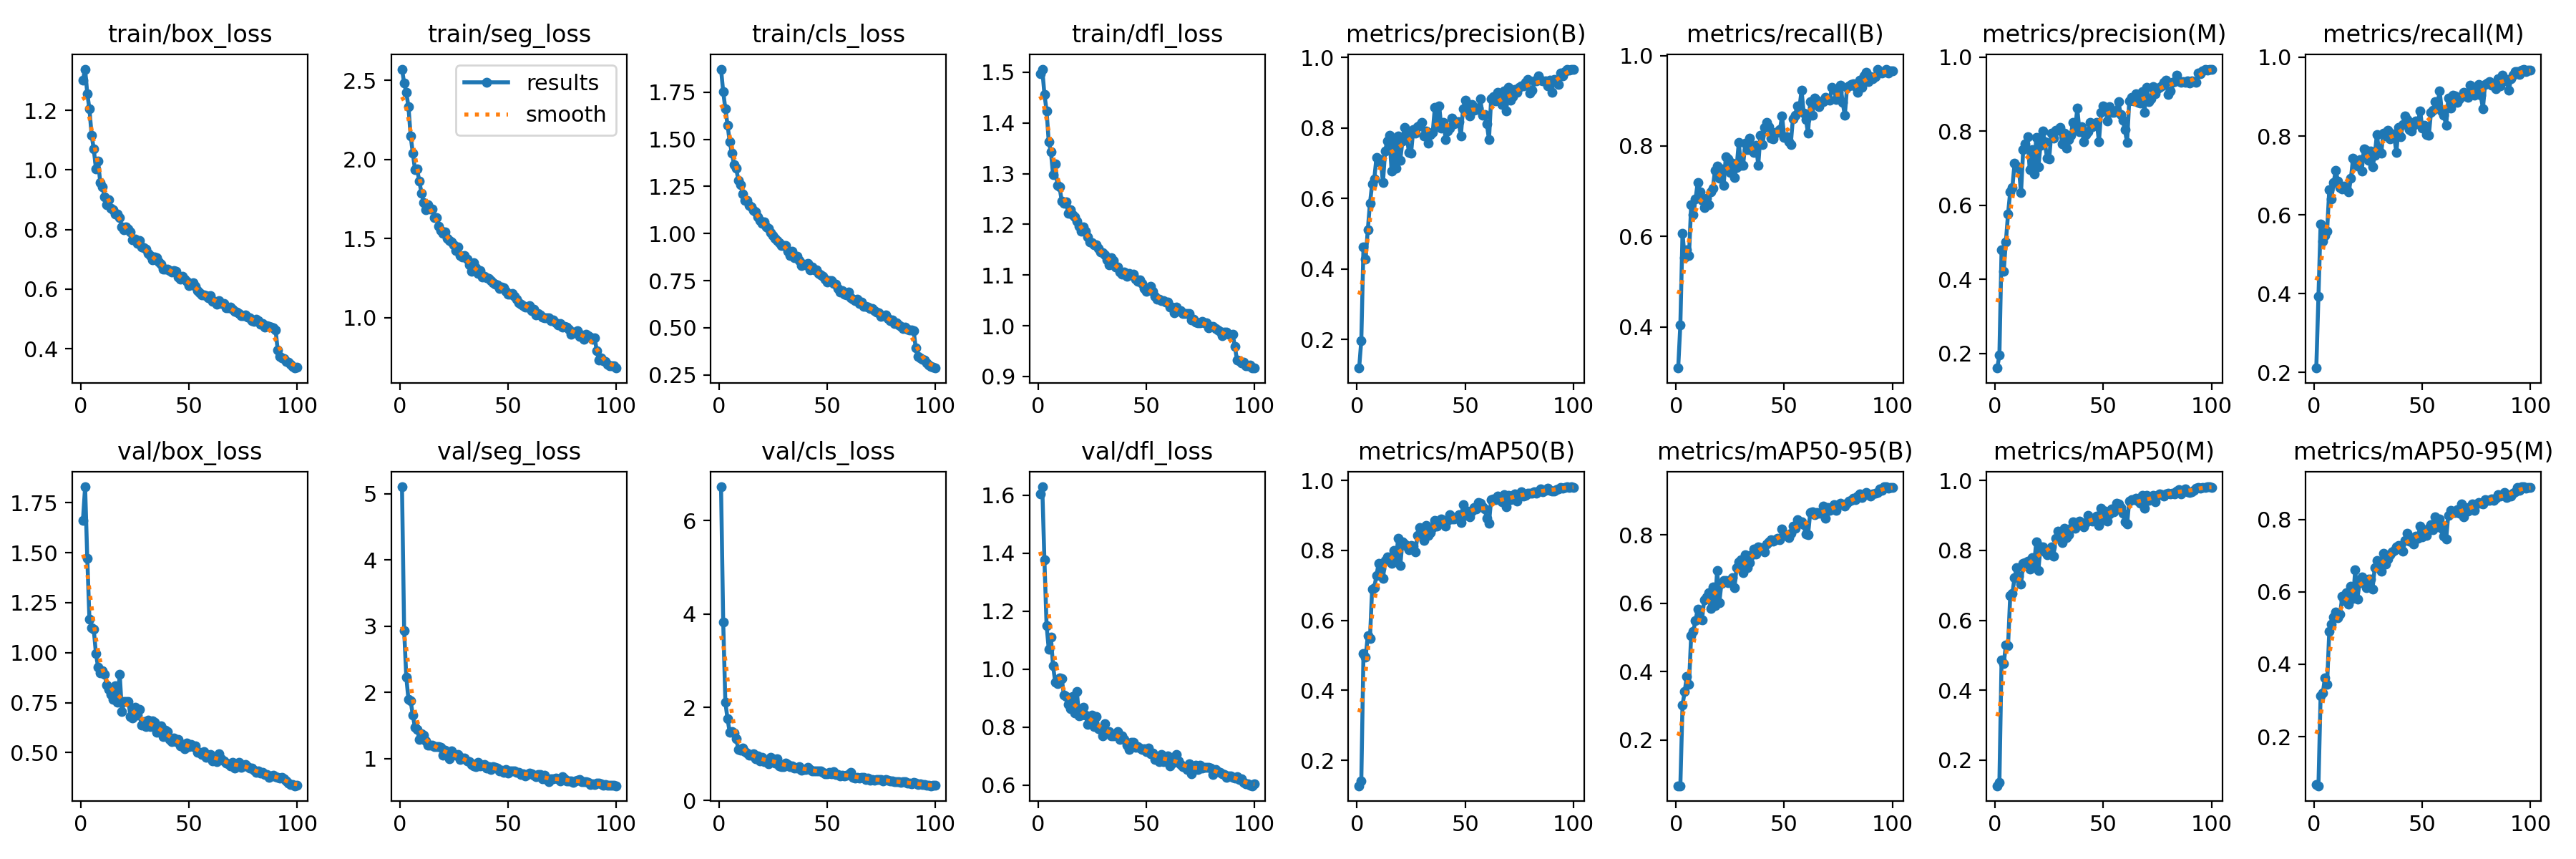

In [18]:
from IPython.display import Image as IPyImage

IPyImage(filename='/kaggle/working/yolov11/runs/segment/train/results.png', width=600)

validation

In [19]:

# !yolo task=segment mode=val model=/kaggle/working/yolov8/runs/segment/train3/weights/best.pt data={dataset.location}/data.yaml
!yolo task=detect mode=val model=/kaggle/working/yolov11/runs/segment/train/weights/best.pt data=/kaggle/working/yolov11/Traffic_01-2/data.yaml

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.7 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11x-seg summary (fused): 491 layers, 62,005,593 parameters, 0 gradients, 318.5 GFLOPs
val: Scanning /kaggle/working/yolov11/Traffic_01-2/valid/labels.cache... 352 ima
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        352        931      0.967       0.97      0.982      0.941      0.967       0.97       0.98      0.888
        Crowded Street         72         86      0.963          1      0.991       0.97      0.963          1      0.991      0.937
            No Traffic        339        670      0.955      0.921      0.962      0.887      0.957      0.923      0.957       0.81
               Traffic        144        175      0.982      0.989      0.992      0.965      0.982      0.989      0.992

test

In [20]:

# !yolo task=segment mode=predict model=/kaggle/working/yolov8/runs/segment/train/weights/best.pt conf=0.50 source={dataset.location}/valid/images save=true
!yolo task=detect mode=predict model=/kaggle/working/yolov11/runs/segment/train/weights/best.pt conf=0.50 source=/kaggle/working/yolov11/Traffic_01-2/valid/images save=True

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.7 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11x-seg summary (fused): 491 layers, 62,005,593 parameters, 0 gradients, 318.5 GFLOPs

image 1/352 /kaggle/working/yolov11/Traffic_01-2/valid/images/1_jpg.rf.41a9b91dd5191942a8fc43a9a865d9eb.jpg: 640x640 1 Crowded Street, 1 No Traffic, 47.5ms
image 2/352 /kaggle/working/yolov11/Traffic_01-2/valid/images/img_310_jpg.rf.ff15a65603ca1ea8a6ecd3d772b84f6b.jpg: 640x640 2 No Traffics, 1 Traffic, 44.7ms
image 3/352 /kaggle/working/yolov11/Traffic_01-2/valid/images/img_311_jpg.rf.71a8213f6a0aa73c8092a96c6a8f8a68.jpg: 640x640 2 No Traffics, 1 Traffic, 44.6ms
image 4/352 /kaggle/working/yolov11/Traffic_01-2/valid/images/img_324_jpg.rf.88243b1c0de8d769dac2efcda5df9d35.jpg: 640x640 1 No Traffic, 44.7ms
image 5/352 /kaggle/working/yolov11/Traffic_01-2/valid/images/img_341

In [21]:
from ultralytics import YOLO


In [22]:
model = YOLO('/kaggle/working/yolov11/runs/segment/train/weights/best.pt')
model.save('/kaggle/working/Traffic_Control.pt') 

In [32]:
import shutil

# مسیر پوشه‌ای که می‌خواهید فشرده کنید
folder_path = '/kaggle/working/yolov11/runs/segment/train8'  # مسیر پوشه خود را اینجا قرار دهید
zip_file_path = '/kaggle/working/result.zip'  # مسیر ذخیره فایل ZIP

# فشرده‌سازی پوشه
shutil.make_archive(zip_file_path.replace('.zip', ''), 'zip', folder_path)

# نمایش پیغام برای دانلود
print(f'فایل ZIP در {zip_file_path} ساخته شد.')


فایل ZIP در /kaggle/working/result.zip ساخته شد.


In [33]:
from IPython.display import FileLink

FileLink(r'Not compatible with kagglehubresult.zip')


/kaggle/working/result.zip

In [43]:
from IPython.display import FileLink

# لینک دانلود برای فایل مدل
FileLink('/kaggle/working/result.zip')

/kaggle/working/result.zip

In [34]:
import os

# بررسی وجود فایل ZIP
zip_file_path = '/kaggle/working/result.zip'

if os.path.exists(zip_file_path):
    print(f'فایل {zip_file_path} وجود دارد.')
else:
    print('فایل مورد نظر یافت نشد. مسیر را دوباره بررسی کنید.')


فایل /kaggle/working/result.zip وجود دارد.


In [ ]:
# نمایش تمام فایل‌ها در دایرکتوری کاری
os.listdir('/kaggle/working/yolov11/runs/segment/train8')


In [32]:
!zip -r my.zip /kaggle/working/yolov11/runs/segment/train

  adding: kaggle/working/yolov11/runs/segment/train/ (stored 0%)
  adding: kaggle/working/yolov11/runs/segment/train/train_batch18362.jpg (deflated 9%)
  adding: kaggle/working/yolov11/runs/segment/train/MaskR_curve.png (deflated 13%)
  adding: kaggle/working/yolov11/runs/segment/train/confusion_matrix.png (deflated 29%)
  adding: kaggle/working/yolov11/runs/segment/train/val_batch2_labels.jpg (deflated 5%)
  adding: kaggle/working/yolov11/runs/segment/train/results.csv (deflated 85%)
  adding: kaggle/working/yolov11/runs/segment/train/BoxF1_curve.png (deflated 11%)
  adding: kaggle/working/yolov11/runs/segment/train/train_batch2.jpg (deflated 5%)
  adding: kaggle/working/yolov11/runs/segment/train/MaskPR_curve.png (deflated 20%)
  adding: kaggle/working/yolov11/runs/segment/train/BoxP_curve.png (deflated 14%)
  adding: kaggle/working/yolov11/runs/segment/train/val_batch1_pred.jpg (deflated 6%)
  adding: kaggle/working/yolov11/runs/segment/train/MaskP_curve.png (deflated 14%)
  adding:

In [33]:
!mv my_mo.zip /kaggle/working/


In [35]:
from IPython.display import FileLink 
FileLink(r'/kaggle/working/my.zip')


/kaggle/working/my.zip

In [36]:
!tar -czvf my_work.zip /kaggle/working/yolov11/runs/segment/train

tar: Removing leading `/' from member names
/kaggle/working/yolov11/runs/segment/train/
/kaggle/working/yolov11/runs/segment/train/train_batch18362.jpg
/kaggle/working/yolov11/runs/segment/train/MaskR_curve.png
/kaggle/working/yolov11/runs/segment/train/confusion_matrix.png
/kaggle/working/yolov11/runs/segment/train/val_batch2_labels.jpg
/kaggle/working/yolov11/runs/segment/train/results.csv
/kaggle/working/yolov11/runs/segment/train/BoxF1_curve.png
/kaggle/working/yolov11/runs/segment/train/train_batch2.jpg
/kaggle/working/yolov11/runs/segment/train/MaskPR_curve.png
/kaggle/working/yolov11/runs/segment/train/BoxP_curve.png
/kaggle/working/yolov11/runs/segment/train/val_batch1_pred.jpg
/kaggle/working/yolov11/runs/segment/train/MaskP_curve.png
/kaggle/working/yolov11/runs/segment/train/val_batch0_pred.jpg
/kaggle/working/yolov11/runs/segment/train/weights/
/kaggle/working/yolov11/runs/segment/train/weights/last.pt
/kaggle/working/yolov11/runs/segment/train/weights/best.pt
/kaggle/worki